In [1]:
#import pandas as pd
#
# # 读取CSV文件
# df = pd.read_csv('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/combine_nuts1_period.csv')

# # 使用str.contains()来筛选包含关键字"DE1"的行
# filtered_df = df[df.apply(lambda row: row.astype(str).str.contains('DE3').any(), axis=1)]
# #print(filtered_df, filtered_df.shape)

# # 如果需要，你还可以保存这些行到一个新的CSV文件中
# filtered_df.to_csv('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/combine_nuts1_period_Berlin.csv', index= True)

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/combine_nuts1_period_Berlin.csv')
#print(df, df.shape)

df_new = df.rename(columns={'Unnamed: 0': 'true index'})
print(df_new)

     true index        date NUTS1  infection_daily   humidity  temperature  \
0             2  2020-03-01   DE3               15  73.874469     6.343339   
1            18  2020-03-02   DE3               22  79.994540     5.413423   
2            34  2020-03-03   DE3               22  85.332524     3.873678   
3            50  2020-03-04   DE3               31  82.305681     3.224481   
4            66  2020-03-05   DE3               25  78.843680     4.483410   
..          ...         ...   ...              ...        ...          ...   
666       10658  2021-12-27   DE3             2598  84.124463    -1.265532   
667       10674  2021-12-28   DE3             2513  88.880840     1.913893   
668       10690  2021-12-29   DE3             2492  95.104220     4.898682   
669       10706  2021-12-30   DE3             2517  93.614232     9.740884   
670       10722  2021-12-31   DE3             1747  85.999689    11.614371   

     traffic_volume  contactMean   contactIdx  policyIdx  
0   

In [3]:
print(df_new.columns)
#delete true index
# del df_new['true index', 'NUTS1']
#df_new= df_new['date'].values.astype(float)
#delete the real index
df_new = df_new.drop('true index', axis=1)
df_new = df_new.drop('NUTS1', axis=1)
df_new = df_new.drop('date', axis=1)

print(df_new)       #true df_new

Index(['true index', 'date', 'NUTS1', 'infection_daily', 'humidity',
       'temperature', 'traffic_volume', 'contactMean', 'contactIdx',
       'policyIdx'],
      dtype='object')
     infection_daily   humidity  temperature  traffic_volume  contactMean  \
0                 15  73.874469     6.343339        17125669    44.854530   
1                 22  79.994540     5.413423        22885340    25.474820   
2                 22  85.332524     3.873678        22290526    26.287739   
3                 31  82.305681     3.224481        22672628    25.824640   
4                 25  78.843680     4.483410        23222186    26.132317   
..               ...        ...          ...             ...          ...   
666             2598  84.124463    -1.265532        32624931    18.788017   
667             2513  88.880840     1.913893        33776319    17.483408   
668             2492  95.104220     4.898682        34523998    17.644848   
669             2517  93.614232     9.740884     

In [4]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

import torch
 
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
 
%matplotlib inline
%config InlineBackend.figure_format='retina'
 
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
 
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
 
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
 
rcParams['figure.figsize'] = 14, 6
register_matplotlib_converters()
 
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [5]:
sequence_length = 14    # use 14 previous days to predict the next one
input_dim = 7           # we have 7 columns

print(df_new.shape, len(df_new))
df_numpy= df_new.values
#scaler= StandardScaler()
scaler= MinMaxScaler()
df_numpy= scaler.fit_transform(df_numpy)

X, Y = [], []
for i in range(len(df_numpy) - sequence_length):
    X.append(df_numpy[i:i+sequence_length])
    Y.append(df_numpy[i+sequence_length, 0])  # Predicting column"A"

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

print('X, Y:', X.shape, Y.shape)

(671, 7) 671
X, Y: torch.Size([657, 14, 7]) torch.Size([657])


/tmp/ipykernel_2427649/3441943651.py:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  X = torch.tensor(X, dtype=torch.float32)


In [6]:
train_size = int(0.7 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size
print(train_size, val_size, test_size)

# X_train, Y_train = X[:train_size], Y[:train_size]
# X_val, Y_val = X[train_size:train_size+val_size], Y[train_size:train_size+val_size]

# X_test, Y_test = X[train_size+val_size:], Y[train_size+val_size:]

# print('train and test length:', X_train.shape, X_val.shape, X_test.shape)

459 131 67


In [7]:
################ randomselect#################
import random
nums = random.sample(range(0, 459+ 131), 459+ 131)
print(len(nums))

590


In [8]:
train_index= nums[:459]
val_index= nums[459: 590+1]
print(len(train_index), len(val_index))
print(train_index)
print(val_index)

459 131
[295, 129, 578, 170, 191, 97, 148, 466, 504, 308, 82, 328, 287, 85, 267, 268, 535, 150, 215, 220, 179, 48, 99, 270, 245, 392, 540, 455, 524, 190, 374, 128, 96, 274, 212, 450, 520, 326, 399, 415, 70, 241, 492, 288, 329, 551, 371, 291, 256, 192, 386, 89, 81, 508, 242, 433, 33, 219, 389, 309, 319, 118, 138, 488, 330, 289, 224, 44, 116, 103, 280, 459, 272, 546, 300, 303, 475, 588, 582, 333, 405, 238, 391, 495, 297, 499, 575, 164, 180, 6, 364, 222, 564, 232, 453, 502, 126, 299, 71, 125, 522, 162, 521, 16, 552, 119, 421, 544, 523, 112, 348, 351, 59, 506, 229, 311, 17, 365, 86, 378, 144, 127, 313, 423, 163, 25, 501, 120, 23, 0, 437, 580, 441, 194, 285, 235, 335, 136, 395, 471, 30, 9, 69, 240, 388, 35, 158, 550, 64, 585, 361, 468, 305, 310, 43, 380, 74, 536, 568, 57, 135, 50, 503, 271, 121, 258, 516, 312, 293, 458, 350, 519, 175, 486, 29, 34, 383, 382, 559, 417, 132, 15, 485, 416, 563, 436, 340, 554, 447, 65, 426, 75, 528, 442, 131, 155, 413, 381, 449, 3, 230, 558, 58, 188, 401, 106, 4

In [9]:
#selected_elements = tensor[indices]
X_train, Y_train = X[train_index], Y[train_index]
X_val, Y_val = X[val_index], Y[val_index]

X_test, Y_test = X[train_size+val_size:], Y[train_size+val_size:]

print('train, valida, test of X:', X_train.shape, X_val.shape, X_test.shape)
print('train, valida, test of Y:', Y_train.shape, Y_val.shape, Y_test.shape)

train, valida, test of X: torch.Size([459, 14, 7]) torch.Size([131, 14, 7]) torch.Size([67, 14, 7])
train, valida, test of Y: torch.Size([459]) torch.Size([131]) torch.Size([67])


In [23]:
# X_train, Y_train = X[:train_size], Y[:train_size]
# X_val, Y_val = X[train_size:train_size+val_size], Y[train_size:train_size+val_size]

# X_test, Y_test = X[train_size+val_size:], Y[train_size+val_size:]

# print('train and test length:', X_train.shape, X_val.shape, X_test.shape)

In [10]:
import torch.nn as nn

class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super(TimeSeriesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, 1)  # Predicting one value (column "A")

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.batch_norm(out[:, -1, :])
        out = self.dropout(out)
        #out = self.dropout(out[:, -1, :])  # Take the last time step
        out = self.fc(out)
        return out

model = TimeSeriesLSTM(input_dim=7, hidden_dim=50, num_layers=2, dropout_prob=0.3)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch [10/200], Training Loss: 0.1132, Validation Loss: 0.0513
Epoch [20/200], Training Loss: 0.0739, Validation Loss: 0.0402
Epoch [30/200], Training Loss: 0.0459, Validation Loss: 0.0308
Epoch [40/200], Training Loss: 0.0249, Validation Loss: 0.0258
Epoch [50/200], Training Loss: 0.0175, Validation Loss: 0.0214
Epoch [60/200], Training Loss: 0.0100, Validation Loss: 0.0196
Epoch [70/200], Training Loss: 0.0082, Validation Loss: 0.0153
Epoch [80/200], Training Loss: 0.0063, Validation Loss: 0.0130
Epoch [90/200], Training Loss: 0.0054, Validation Loss: 0.0102
Epoch [100/200], Training Loss: 0.0054, Validation Loss: 0.0064
Epoch [110/200], Training Loss: 0.0045, Validation Loss: 0.0107
Epoch [120/200], Training Loss: 0.0040, Validation Loss: 0.0026
Epoch [130/200], Training Loss: 0.0046, Validation Loss: 0.0033
Epoch [140/200], Training Loss: 0.0036, Validation Loss: 0.0022
Epoch [150/200], Training Loss: 0.0037, Validation Loss: 0.0023
Epoch [160/200], Training Loss: 0.0038, Validatio

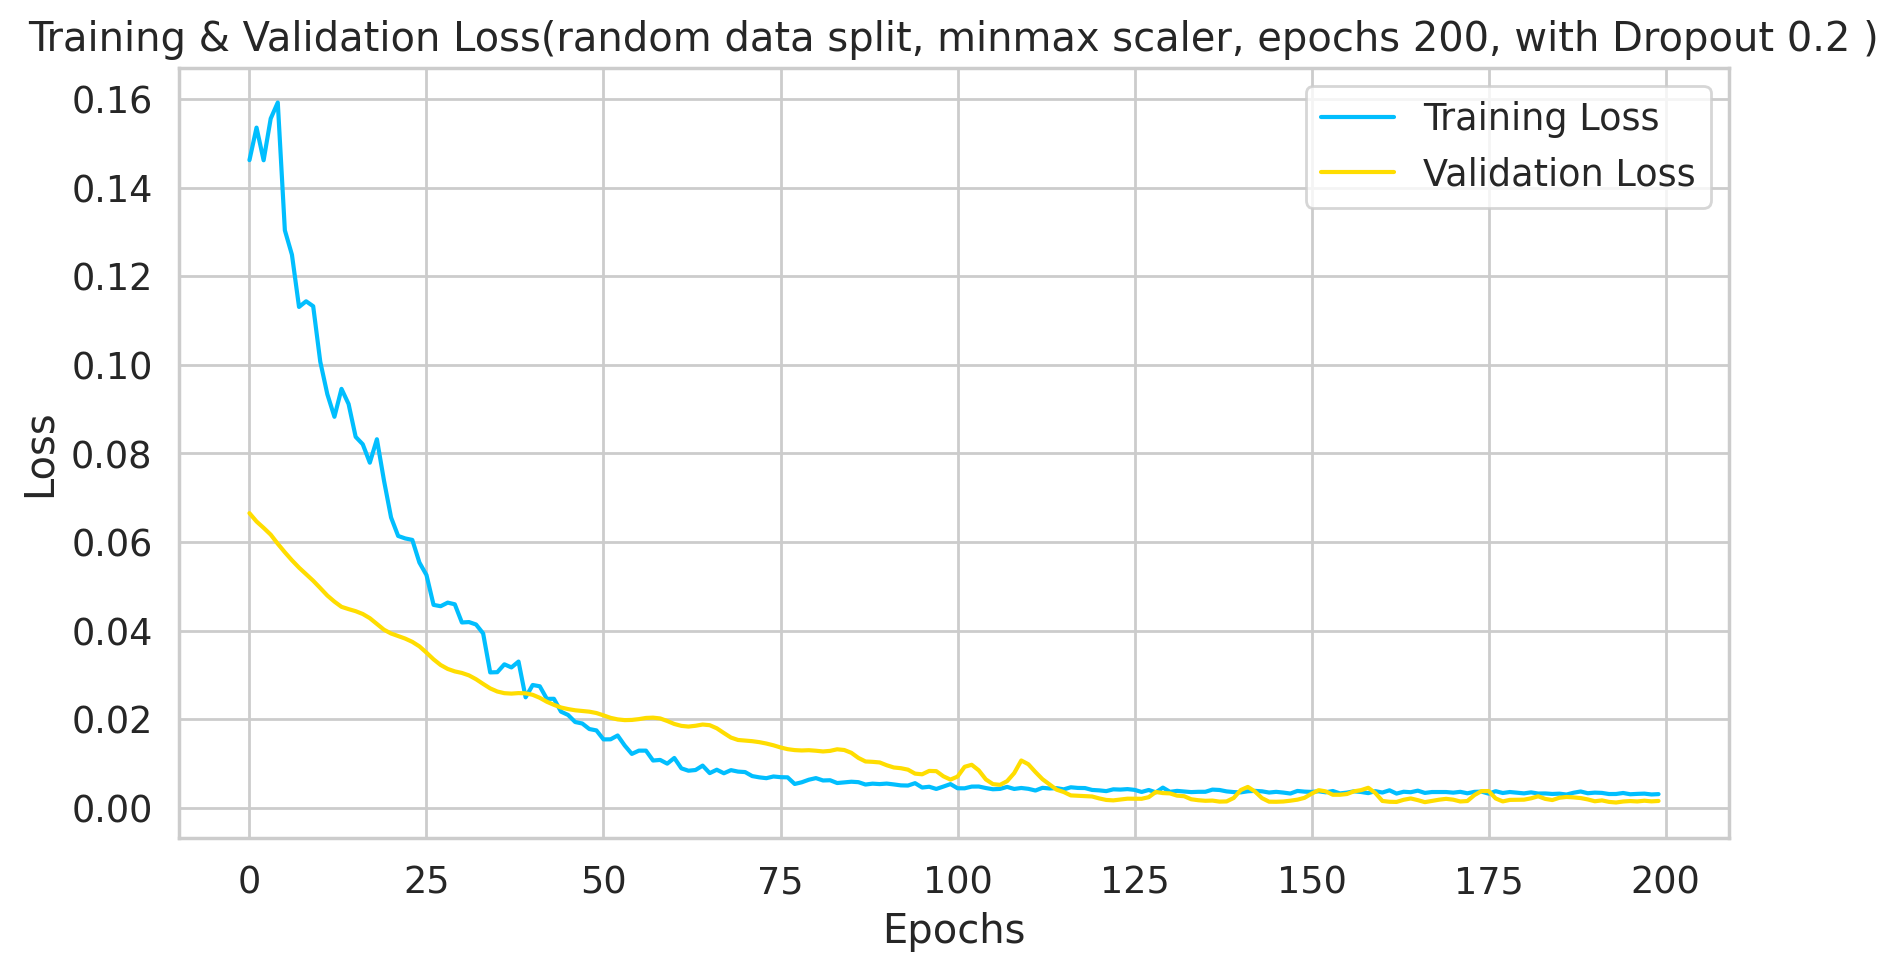

In [11]:
############################ random data split, minmax scaler, epochs 200, with Dropout 0.3 #######################
epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss(random data split, minmax scaler, epochs 200, with Dropout 0.2 )')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
############################ random data split, minmax scaler, epochs 200, without Dropout #######################
epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss(random data split, minmax scaler, epochs 200, without Dropout )')
plt.legend()
plt.grid(True)
plt.show()

############################# SHAP part ##########################

In [10]:
import shap

/home/fe/twang/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/fe/twang/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max

Use Explainer to turn data from 3D to 2D

In [11]:
#######################################      Explainer    #############################################
import torch
print('train, valida, test of X:', X_train.shape, X_val.shape, X_test.shape)
print('train, valida, test of Y:', Y_train.shape, Y_val.shape, Y_test.shape)
# 假设data是原始三维时间序列数据: [日期数, 时间步数, 特征数]
# data = ...

# 展平时间步和特征维度
# 新的维度将是 [日期数, 时间步数 * 特征数]
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
# 用展平后的数据创建Tensor
X_train_flattened_tensor = torch.tensor(X_train_flattened, dtype=torch.float32)
print(X_train_flattened_tensor.shape)

X_val_flattened = X_val.reshape(X_val.shape[0], -1)
# 用展平后的数据创建Tensor
X_val_flattened_tensor = torch.tensor(X_val_flattened, dtype=torch.float32)
print(X_val_flattened_tensor.shape)

# 为LSTM创建输入
# 这里，序列长度将是展平后的时间步与特征的乘积
#lstm = torch.nn.LSTM(input_size= X_train_flattened.shape[1], hidden_size= 50, batch_first=True)
# 进行训练（示例）
# 假设您已经设置了训练循环和必要的参数
#outputs, (hn, cn) = lstm(X_train_flattened_tensor.unsqueeze(0))

train, valida, test of X: torch.Size([459, 14, 7]) torch.Size([131, 14, 7]) torch.Size([67, 14, 7])
train, valida, test of Y: torch.Size([459]) torch.Size([131]) torch.Size([67])
torch.Size([459, 98])
torch.Size([131, 98])


To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [12]:
class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super(TimeSeriesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, 1)  # Predicting one value (column "A")

    def forward(self, x):
        out, _ = self.lstm(x)
        #out = self.batch_norm(out[:, -1, :])
        out = self.batch_norm(out)
        out = self.dropout(out)
        #out = self.dropout(out[:, -1, :])  # Take the last time step
        out = self.fc(out)
        return out

model = TimeSeriesLSTM(input_dim= 14*7, hidden_dim=50, num_layers=2, dropout_prob=0.3)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

TimeSeriesLSTM(
  (lstm): LSTM(98, 50, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


Epoch [10/100], Training Loss: 0.1722, Validation Loss: 0.0312
Epoch [20/100], Training Loss: 0.1133, Validation Loss: 0.0155
Epoch [30/100], Training Loss: 0.1197, Validation Loss: 0.0170
Epoch [40/100], Training Loss: 0.1043, Validation Loss: 0.0161
Epoch [50/100], Training Loss: 0.0974, Validation Loss: 0.0134
Epoch [60/100], Training Loss: 0.0996, Validation Loss: 0.0125
Epoch [70/100], Training Loss: 0.0874, Validation Loss: 0.0148
Epoch [80/100], Training Loss: 0.0639, Validation Loss: 0.0244
Epoch [90/100], Training Loss: 0.0582, Validation Loss: 0.2660
Epoch [100/100], Training Loss: 0.0423, Validation Loss: 0.0445


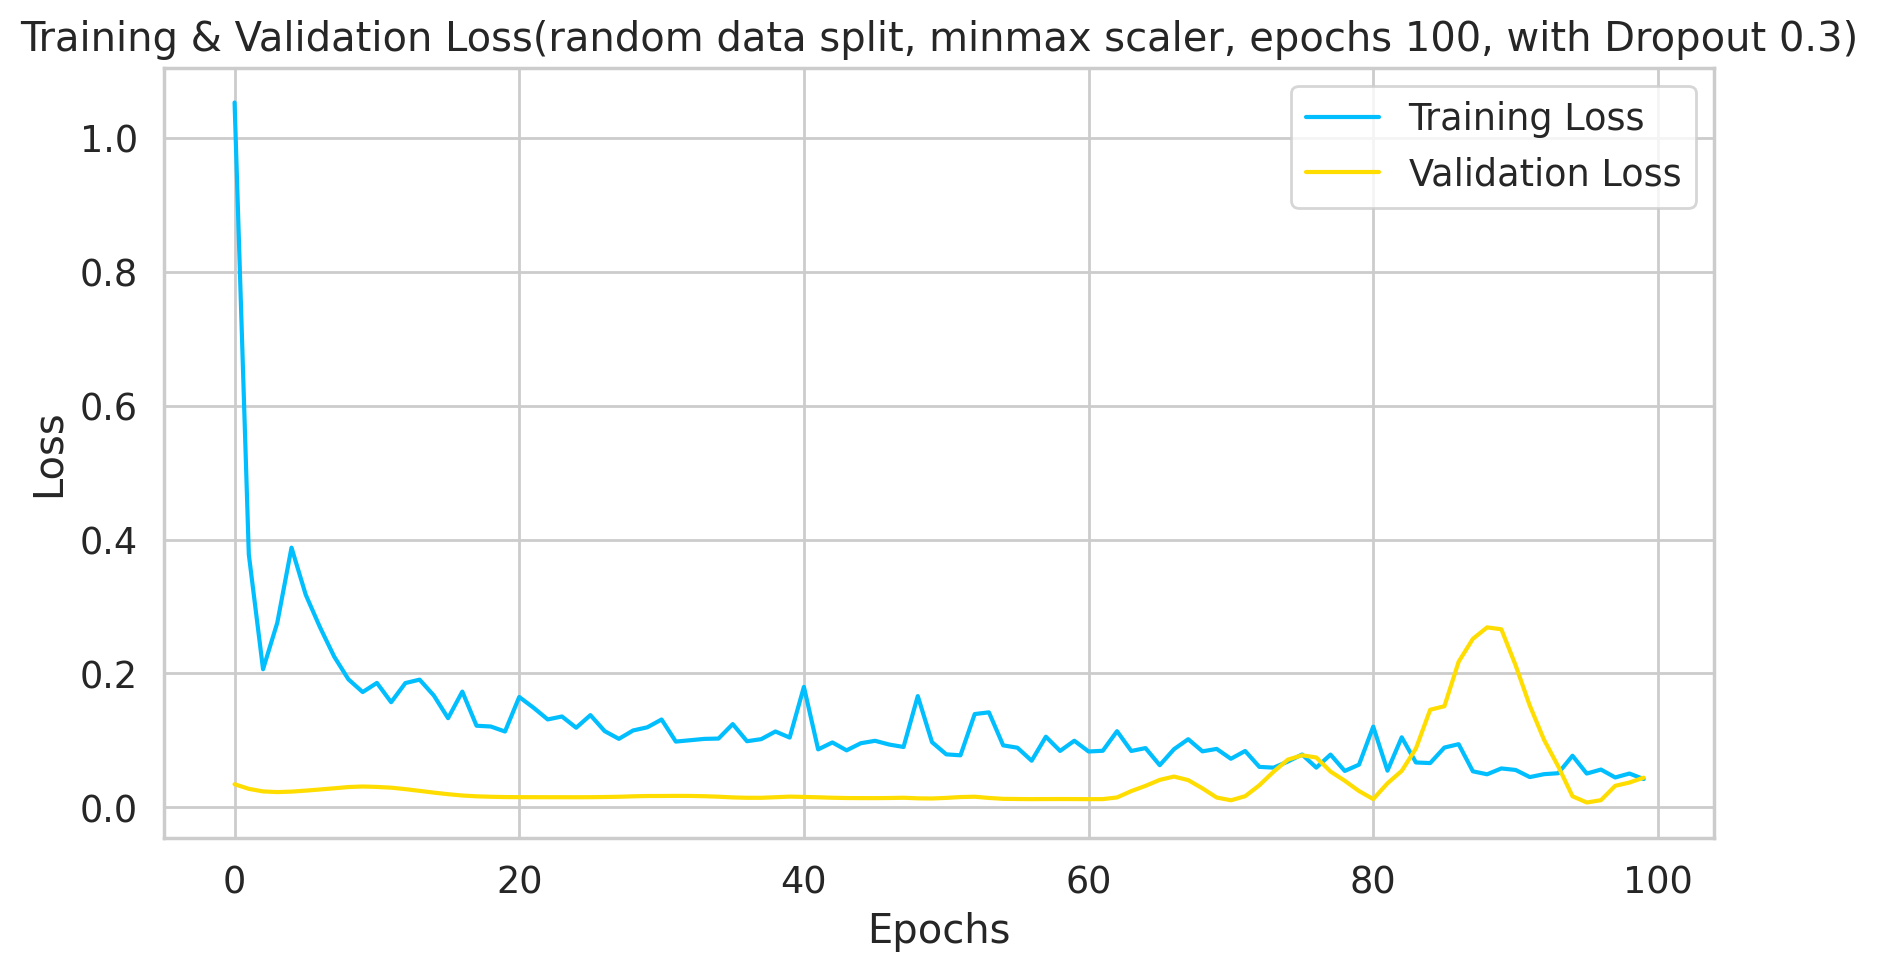

In [13]:
############################ random data split, minmax scaler, epochs 100, without Dropout  #######################
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train_flattened_tensor )
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_flattened_tensor )
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss(random data split, minmax scaler, epochs 100, with Dropout 0.3)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
################## save the model#####################
torch.save(model.state_dict(), '/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/codes/uncertainty_LSTM_Expaliner_dp0.3.pth')
#torch.save(model.state_dict(), 'model_state.pth')

loaded_model= torch.load('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/codes/uncertainty_LSTM_Expaliner.pth')

device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")   
model = TimeSeriesLSTM(input_dim= 14*7, hidden_dim=50, num_layers=2, dropout_prob=0.0).to(device)
model.load_state_dict(loaded_model)

<All keys matched successfully>

In [19]:
# class TimeSeriesLSTM(nn.Module):
#     def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
#         super(TimeSeriesLSTM, self).__init__()
#         self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
#         self.batch_norm = nn.BatchNorm1d(hidden_dim)
#         self.dropout = nn.Dropout(dropout_prob)
#         self.fc = nn.Linear(hidden_dim, 1)  # Predicting one value (column "A")

#     def forward(self, x):
#         out, _ = self.lstm(x)
#         #out = self.batch_norm(out[:, -1, :])
#         out = self.batch_norm(out)
#         out = self.dropout(out)
#         #out = self.dropout(out[:, -1, :])  # Take the last time step
#         out = self.fc(out)
#         return out
def model_update(XX):

    model.eval()
    #return model(XX).detach().cpu().numpy()
    return model(XX).detach().cpu()
print(model_update)

<function model_update at 0x7f4504a35550>


In [20]:
X_val_np= X_val_flattened_tensor.numpy()
X_val_df= pd.DataFrame(X_val_np)
print(X_val_df.shape)

# A masking function takes a binary mask vector as the first argument and
# the model arguments for a single sample after that
# It returns a masked version of the input x, where you can return multiple
# rows to average over a distribution of masking types
def custom_masker(mask, x):
    # in this simple example we just zero out the features we are masking
    return (x * mask).reshape(1, len(x))

#explainer = shap.Explainer(model, X_val_flattened_tensor)
#model_update= model
explainer = shap.Explainer(model_update, custom_masker)

#shap_values = explainer(X_val_df)
print(X_val_flattened_tensor.size())
shap_values = explainer(X_val_flattened_tensor)
print(X_val_flattened_tensor.shape)

(131, 98)
this is the chosen algorithm: permutation
torch.Size([131, 98])


AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [20]:
#explainer = shap.GradientExplainer(model, background)
#shap_values, _ = explainer.shap_values(X_test, nsamples=100)

# Plotting for a specific instance
# shap.initjs()
# shap.force_plot(explainer.expected_value[0].detach().numpy(), shap_values[0][0], X_test[0].detach().numpy())
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], feature_names=['feature1', 'feature2', ...])

AttributeError: 'Permutation' object has no attribute 'expected_value'

In [15]:
################## save the model#####################
torch.save(model, '/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/codes/uncertainty_LSTM.pth')

loaded_model= torch.load('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/codes/uncertainty_LSTM.pth')

In [16]:
######################### SHAP ##########################
import shap

# Assuming `model` is your trained LSTM model
explainer = shap.DeepExplainer(model, X_train[:100]) # Use a subset of the training data as background
shap_values = explainer.shap_values(X_test)

/home/fe/twang/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/fe/twang/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max

In [20]:
# Plotting the SHAP values for the first instance in the test set
shap.initjs()
#shap.force_plot(explainer.expected_value[0].detach().numpy(), shap_values[0][0], X_test[0].detach().numpy())
shap.force_plot(explainer.expected_value[0].detach().numpy(), shap_values[0][0], X_test[0].detach().numpy())


AttributeError: 'numpy.float32' object has no attribute 'detach'

In [ ]:
# Summing SHAP values over all time steps
shap_aggregated = shap_values[0].sum(axis=1)

# Plot summary
shap.summary_plot(shap_aggregated, X_test.detach().numpy().sum(axis=1))


Epoch [10/70], Training Loss: 0.0207, Validation Loss: 0.0103
Epoch [20/70], Training Loss: 0.0191, Validation Loss: 0.0057
Epoch [30/70], Training Loss: 0.0176, Validation Loss: 0.0047
Epoch [40/70], Training Loss: 0.0145, Validation Loss: 0.0050
Epoch [50/70], Training Loss: 0.0088, Validation Loss: 0.0024
Epoch [60/70], Training Loss: 0.0076, Validation Loss: 0.0053
Epoch [70/70], Training Loss: 0.0058, Validation Loss: 0.0023


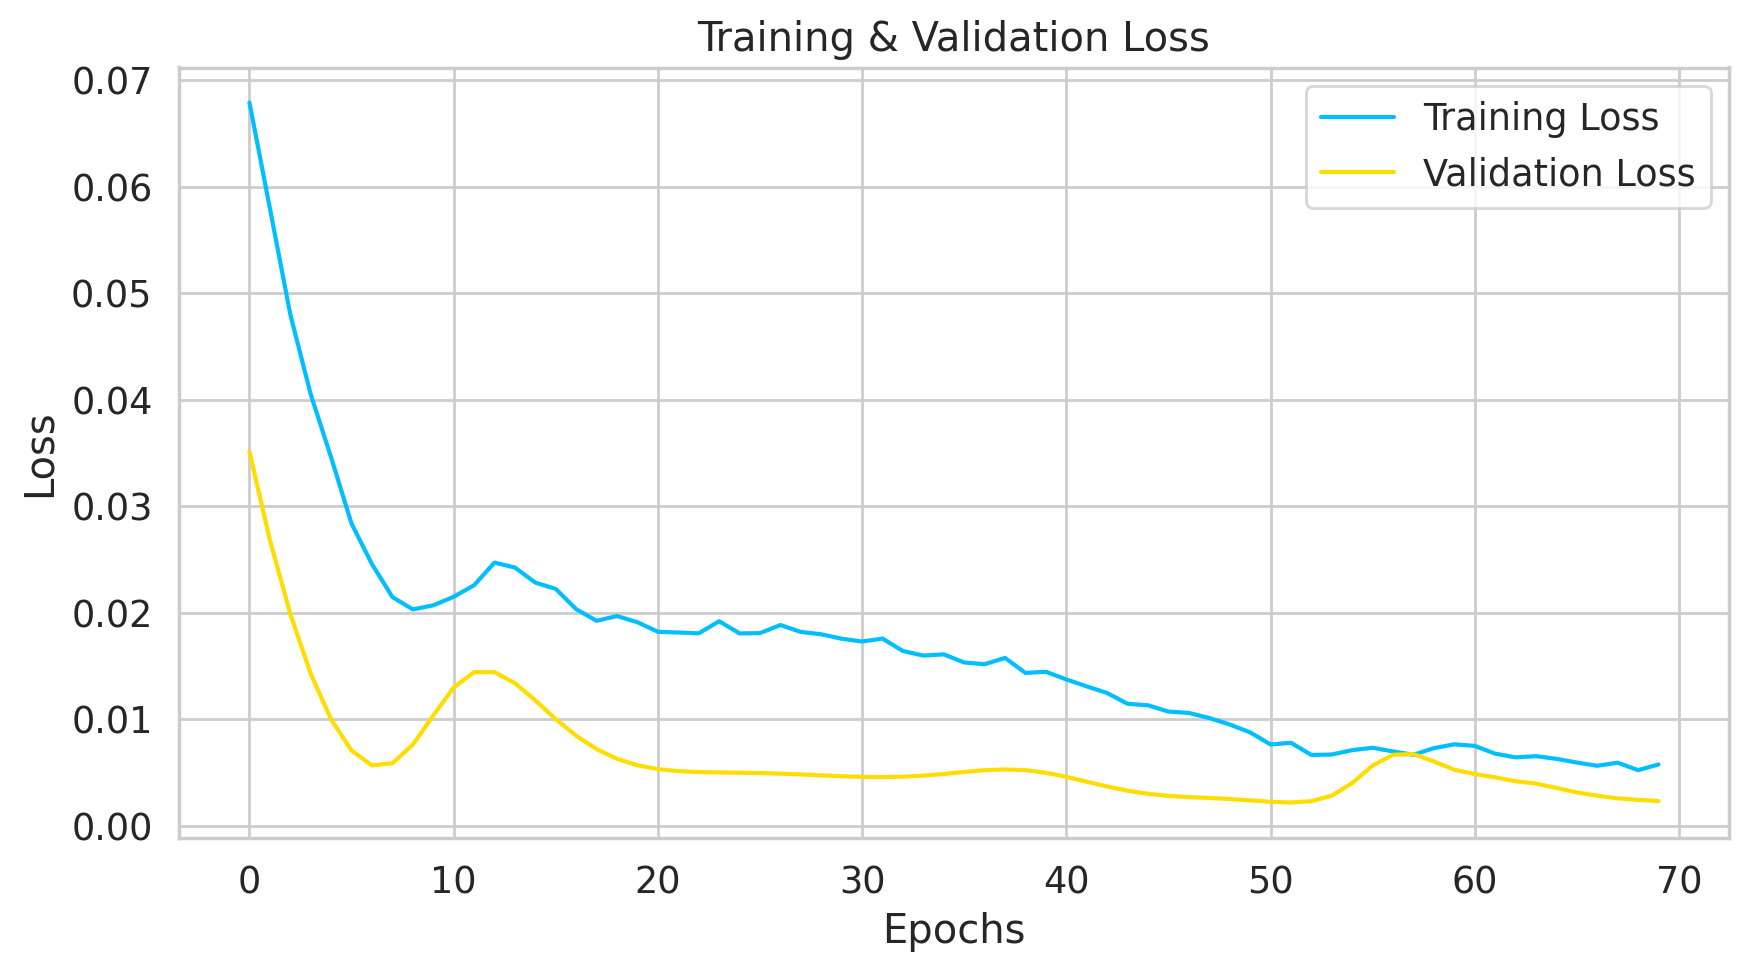

In [26]:
############################ minmax scaler, epochs 70#######################
epochs = 70
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch [10/70], Training Loss: 0.3622, Validation Loss: 0.1003
Epoch [20/70], Training Loss: 0.1745, Validation Loss: 0.0667
Epoch [30/70], Training Loss: 0.1393, Validation Loss: 0.0532
Epoch [40/70], Training Loss: 0.1017, Validation Loss: 0.0782
Epoch [50/70], Training Loss: 0.0889, Validation Loss: 0.0829
Epoch [60/70], Training Loss: 0.0782, Validation Loss: 0.0757
Epoch [70/70], Training Loss: 0.0682, Validation Loss: 0.0860


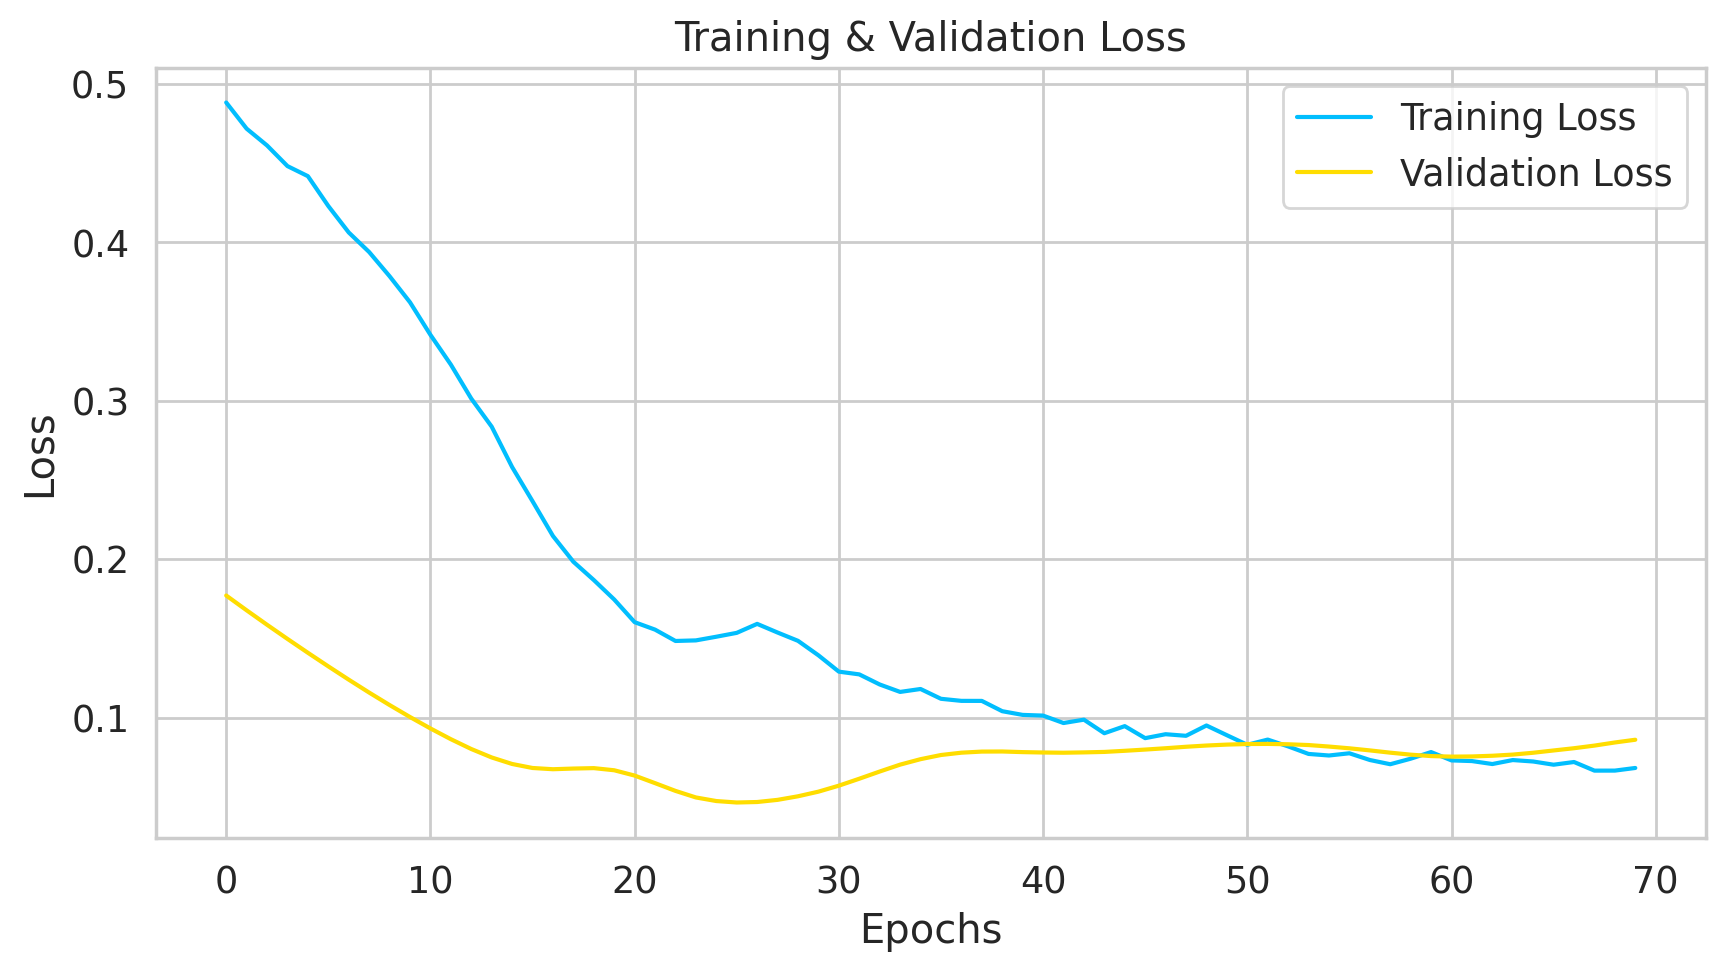

In [17]:
############################ standard scaler, epochs 70#######################
epochs = 70
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch [10/100], Training Loss: 0.3622, Validation Loss: 0.1003
Epoch [20/100], Training Loss: 0.1745, Validation Loss: 0.0667
Epoch [30/100], Training Loss: 0.1393, Validation Loss: 0.0532
Epoch [40/100], Training Loss: 0.1017, Validation Loss: 0.0782
Epoch [50/100], Training Loss: 0.0889, Validation Loss: 0.0829
Epoch [60/100], Training Loss: 0.0782, Validation Loss: 0.0757
Epoch [70/100], Training Loss: 0.0682, Validation Loss: 0.0860
Epoch [80/100], Training Loss: 0.0665, Validation Loss: 0.1072
Epoch [90/100], Training Loss: 0.0674, Validation Loss: 0.1148
Epoch [100/100], Training Loss: 0.0643, Validation Loss: 0.1164


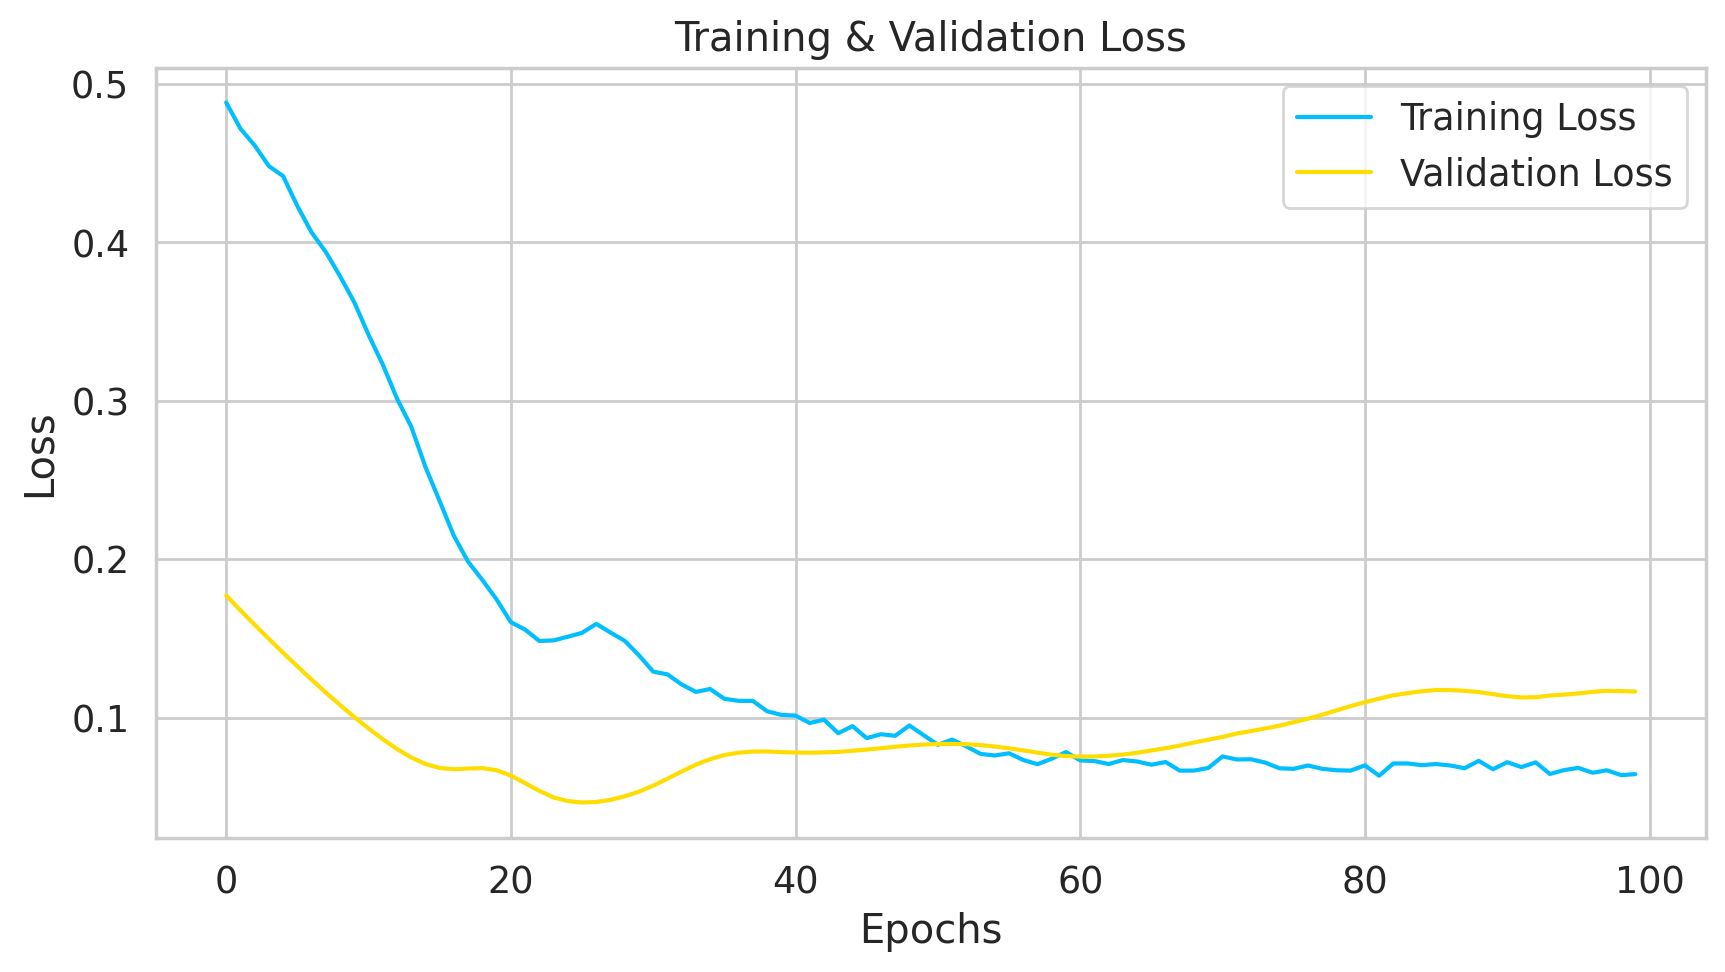

In [8]:
############################ minmax scaler, epochs 70#######################
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch [10/1000], Training Loss: 0.3622, Validation Loss: 0.1003
Epoch [20/1000], Training Loss: 0.1745, Validation Loss: 0.0667
Epoch [30/1000], Training Loss: 0.1393, Validation Loss: 0.0532
Epoch [40/1000], Training Loss: 0.1017, Validation Loss: 0.0782
Epoch [50/1000], Training Loss: 0.0889, Validation Loss: 0.0829
Epoch [60/1000], Training Loss: 0.0782, Validation Loss: 0.0757
Epoch [70/1000], Training Loss: 0.0682, Validation Loss: 0.0860
Epoch [80/1000], Training Loss: 0.0665, Validation Loss: 0.1072
Epoch [90/1000], Training Loss: 0.0674, Validation Loss: 0.1148
Epoch [100/1000], Training Loss: 0.0643, Validation Loss: 0.1164
Epoch [110/1000], Training Loss: 0.0706, Validation Loss: 0.1183
Epoch [120/1000], Training Loss: 0.0647, Validation Loss: 0.1348
Epoch [130/1000], Training Loss: 0.0670, Validation Loss: 0.1396
Epoch [140/1000], Training Loss: 0.0635, Validation Loss: 0.1439
Epoch [150/1000], Training Loss: 0.0579, Validation Loss: 0.1576
Epoch [160/1000], Training Loss: 0

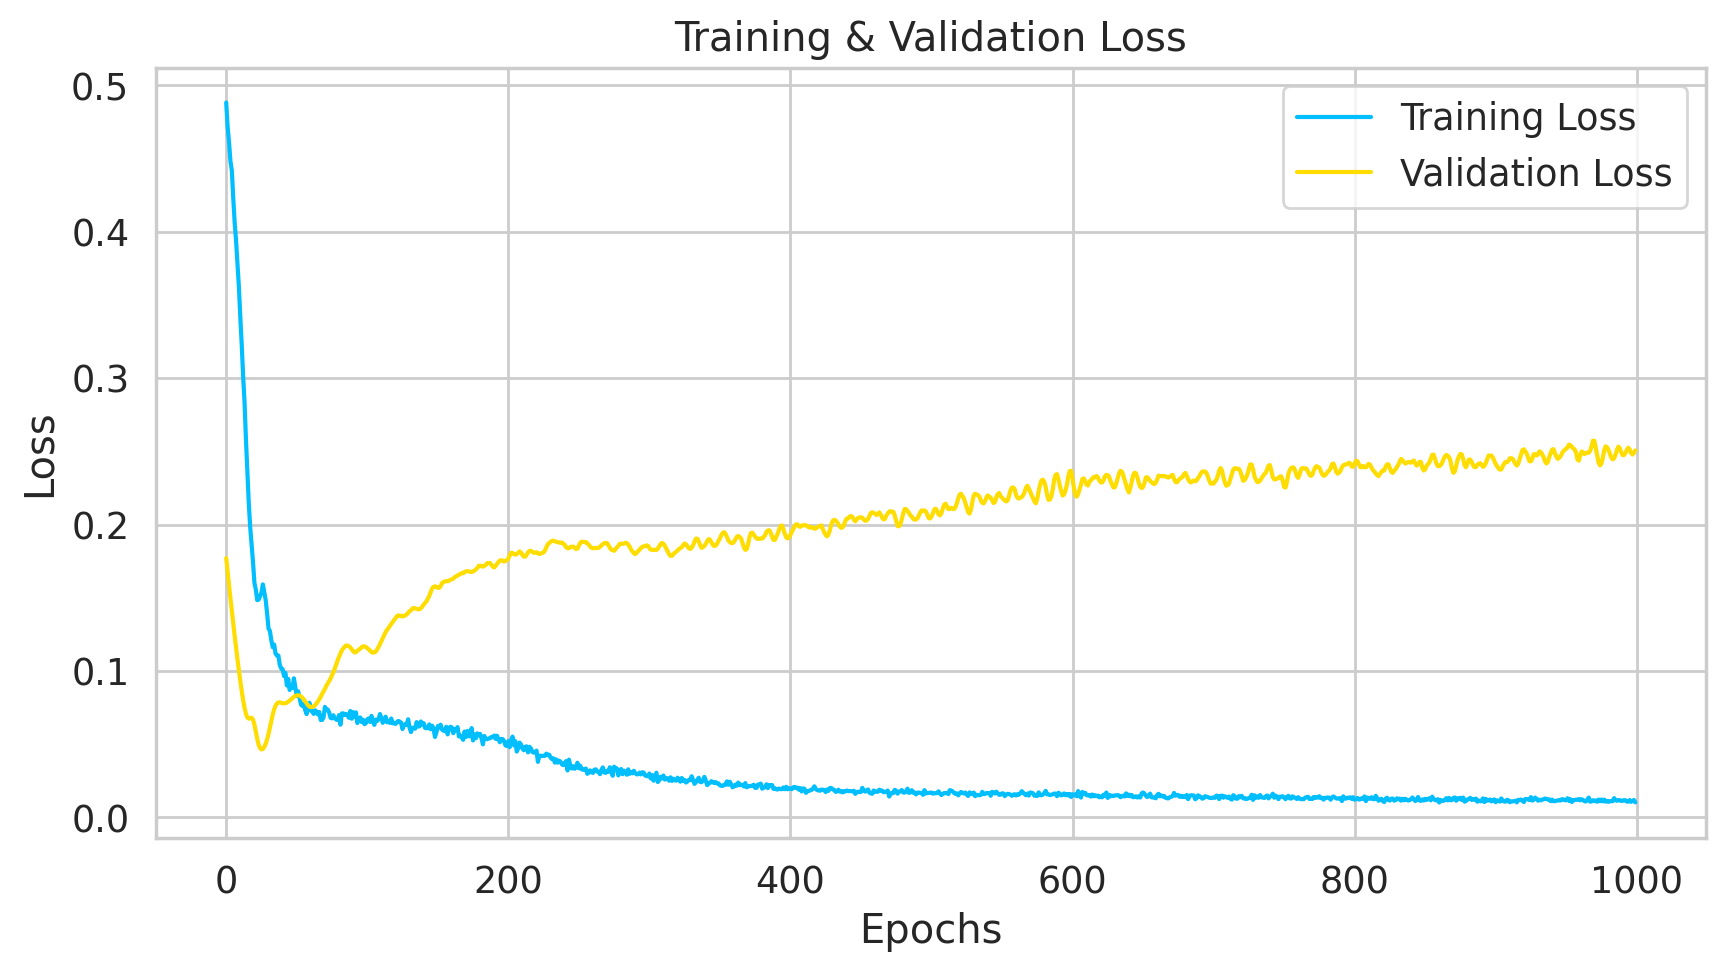

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


BARD

In [24]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get the last 14 days of data
        X = self.data[idx - 14:idx]

        # Standardize the data
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        # Get the target variable
        y = self.data[idx]

        return X, y

In [11]:
# scaler = StandardScaler()
# #scaler = scaler.fit(np.expand_dims(df_new[:657], axis=1))
# scaler = scaler.fit(df_new[:657])
 
# train_data = scaler.transform(df_new[:657])
# test_data = scaler.transform(df_new[657:])

In [25]:
train_dataset = Dataset(df_new[:657])
test_dataset = Dataset(df_new[657:])
print(train_dataset)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= 16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1)

In [26]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(LSTMModel, self).__init__()

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=dropout)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.linear(x)

        return x


In [27]:
model = LSTMModel(input_size=7, hidden_size=128, num_layers= 3, dropout=0.3)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Forward pass
        output = model(data)

        # Compute loss
        loss = criterion(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress
        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch + 1}, Batch: {batch_idx}, Loss: {loss.item():.4f}')


KeyError: 418

In [ ]:
with torch.no_grad():
    total_loss = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        # Forward pass
        output = model(data)

        # Compute loss
        loss = criterion(output, target)

        # Update total loss
        total_loss += loss.item()

    # Compute average loss
    avg_loss = total_loss / len(test_loader)

    print(f'Test loss: {avg_loss:.4f}')
